<a href="https://colab.research.google.com/github/nikitakandpal/ML-projects/blob/main/Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
import warnings

In [ ]:
df = pd.read_csv("health.csv")

Q1. Summarizing the data

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


How much data is present?

In [ ]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1338
Number of columns: 7


So we have summarized that the amount of data present in the Song data is as retured by data.shape

1338 rows × 7 columns

In [ ]:
for col in df.columns:
  print(col, ':',len(df[col].unique()), 'labels')

age : 47 labels
sex : 2 labels
bmi : 548 labels
children : 6 labels
smoker : 2 labels
region : 4 labels
charges : 1337 labels


The list of continuous valued features are:

*   age       1338 non-null   int64
*   bmi       1338 non-null   float64
*   children  1338 non-null   int64
*   charges   1338 non-null   float64

The list of categorical features are:

*   sex       1338 non-null   object
*   smoker    1338 non-null   object
*   region    1338 non-null   object

B. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Statistical Values

In [ ]:
statistics = df.describe()
print(statistics)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
categorical_features = ['sex','children', 'smoker', 'region']

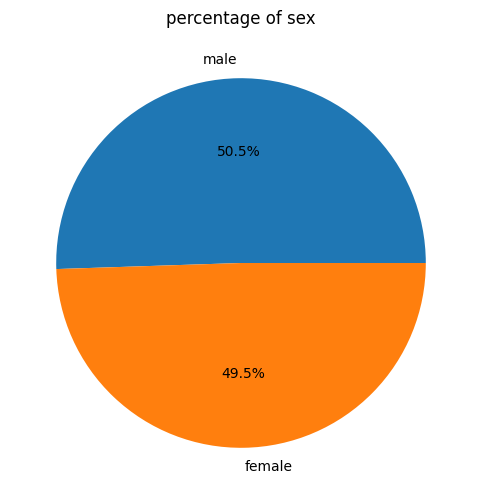

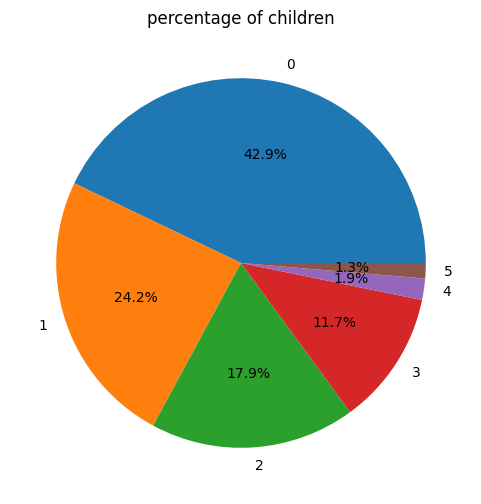

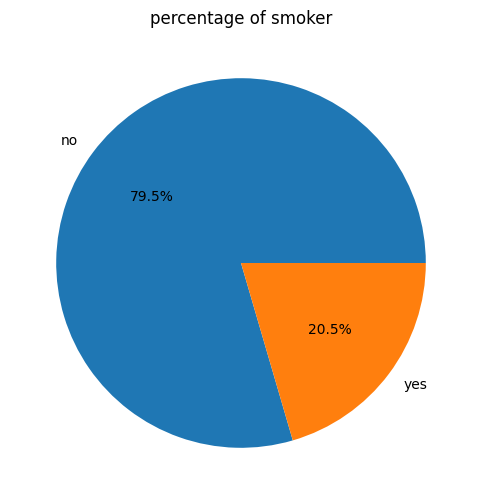

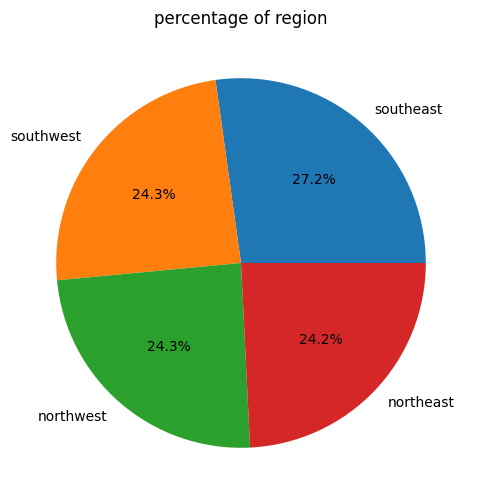

In [ ]:
for c in categorical_features :
    s = df[c].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(s, labels=s.index, autopct='%1.1f%%')
    plt.title(f'percentage of {c}')
    plt.show()

Here, we perform One hot encoding for categorical data.

In [ ]:
# Assuming you have a list of categorical column names

categorical_columns = ['sex', 'smoker','region']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# The resulting DataFrame 'df_encoded' will have one-hot encoded columns
# Now, 'df_encoded' contains all the original columns plus one-hot encoded columns

# You can save the encoded DataFrame back to 'df' if needed
df = df_encoded


After one-hot encoding

In [ ]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


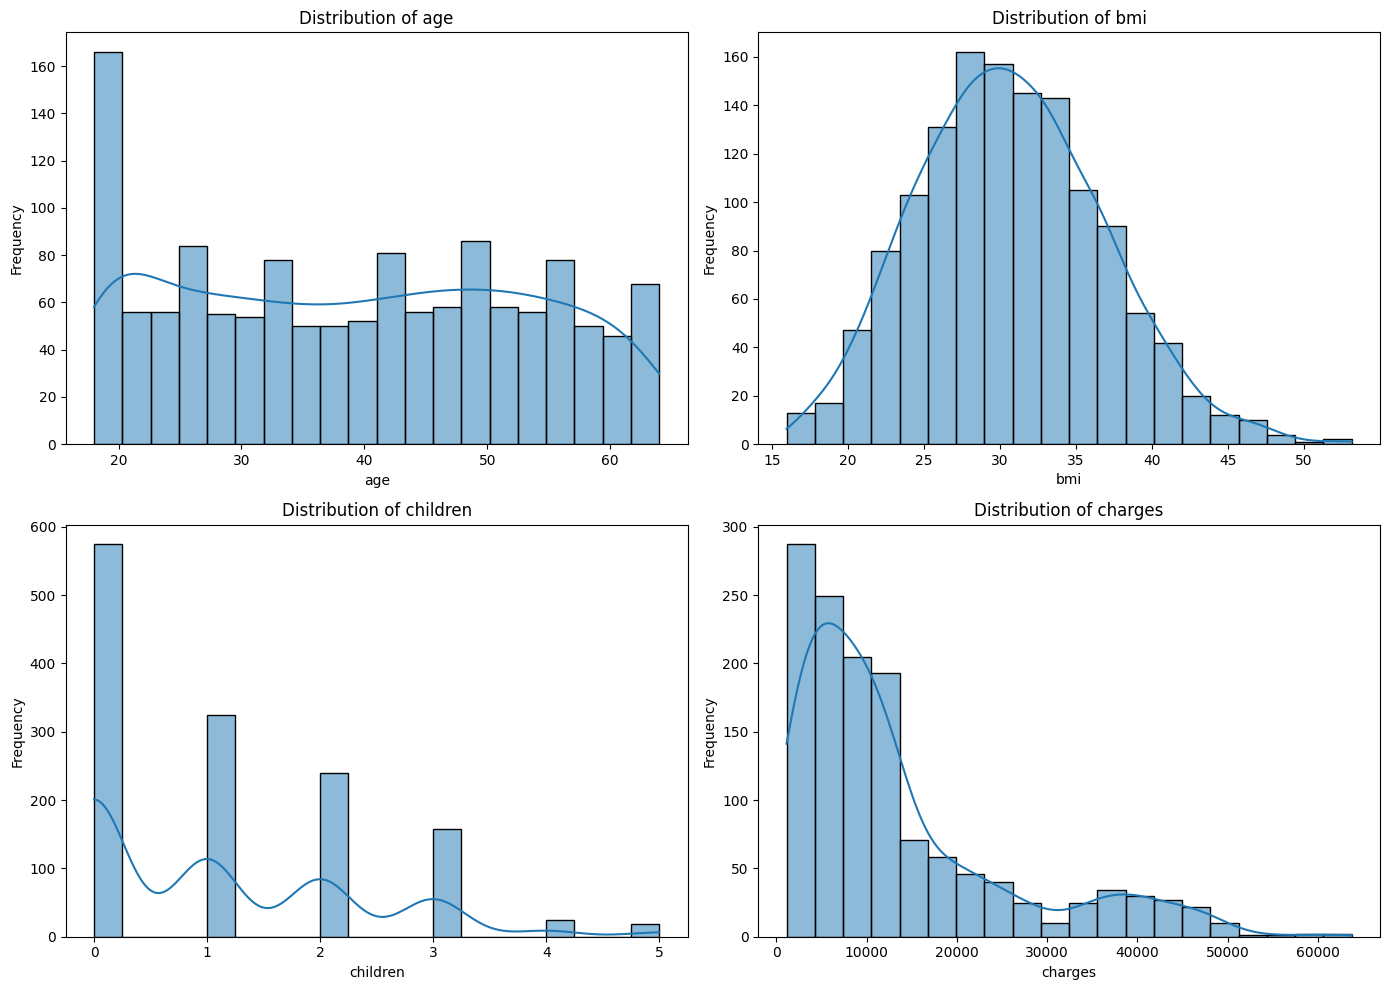

In [ ]:
# Get columns of interest (floats and ints)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for subplots
num_rows = len(numeric_columns) // 2 + len(numeric_columns) % 2
num_cols = 2  # Two columns of subplots

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the numeric columns and plot histograms
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots (if the number of columns is odd)
if len(numeric_columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


In [ ]:
df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

So there are no missing values in the dataset.

Now we calculate and count outliers in each column of a DataFrame using the IQR method.

In [ ]:
# Define the find_outliers function for IQR-based outlier detection
def find_outliers(df, column_name, threshold=1.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

def count_outliers_in_all_columns(df, threshold=1.5):
    outlier_counts = {}

    # Iterate over each column in the DataFrame
    for column_name in df.columns:
        # Calculate and identify outliers for the current column
        outliers = find_outliers(df, column_name, threshold)

        # Count the number of outliers and store it in the dictionary
        outlier_counts[column_name] = len(outliers)

    return outlier_counts

# Example usage:
# To count outliers in all columns of your DataFrame 'df'
outlier_counts = count_outliers_in_all_columns(df)

# Print the dictionary of outlier counts for each column
for column, count in outlier_counts.items():
    print(f"Number of outliers in '{column}':", count)


Number of outliers in 'age': 0
Number of outliers in 'bmi': 9
Number of outliers in 'children': 0
Number of outliers in 'charges': 139
Number of outliers in 'sex_female': 0
Number of outliers in 'sex_male': 0
Number of outliers in 'smoker_no': 274
Number of outliers in 'smoker_yes': 274
Number of outliers in 'region_northeast': 324
Number of outliers in 'region_northwest': 325
Number of outliers in 'region_southeast': 0
Number of outliers in 'region_southwest': 325


Here we check and apply a log transformation to numerical columns in a DataFrame if their skewness exceeds a threshold.

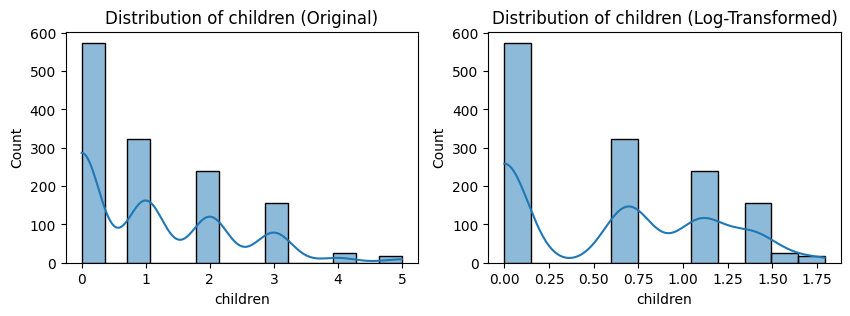

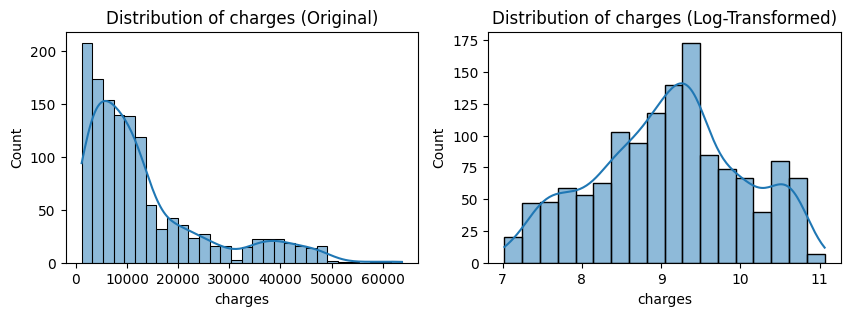

Columns Log-Transformed: ['children', 'charges']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

def check_and_apply_log_transform(df, numerical_columns, skew_threshold=0.5, plot=False):

    transformed_df = df.copy()
    transformed_columns = []

    for column in numerical_columns:
        # Calculate skewness
        skewness = skew(df[column])

        if abs(skewness) > skew_threshold:
            # Apply log transformation
            transformed_df[column] = np.log1p(df[column])
            transformed_columns.append(column)

            if plot:
                # Plot histograms before and after transformation
                plt.figure(figsize=(10, 3))
                plt.subplot(1, 2, 1)
                sns.histplot(df[column], kde=True)
                plt.title(f'Distribution of {column} (Original)')
                plt.subplot(1, 2, 2)
                sns.histplot(transformed_df[column], kde=True)
                plt.title(f'Distribution of {column} (Log-Transformed)')
                plt.show()

    return transformed_df, transformed_columns

# List of numerical columns to check for skewness and potentially transform
numerical_columns = ['age', 'bmi', 'children', 'charges']

# Check for skewness and apply log transformation
transformed_df, transformed_columns = check_and_apply_log_transform(df, numerical_columns, skew_threshold=0.5, plot=True)

# Print the list of columns that were log-transformed
print("Columns Log-Transformed:", transformed_columns)


C. Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

We will now check the Pearson Correlation Coefficients and plot the Pearson Correlation Heatmap.

In [ ]:
df.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


In [ ]:
correlation_matrix = df.corr(method='pearson')

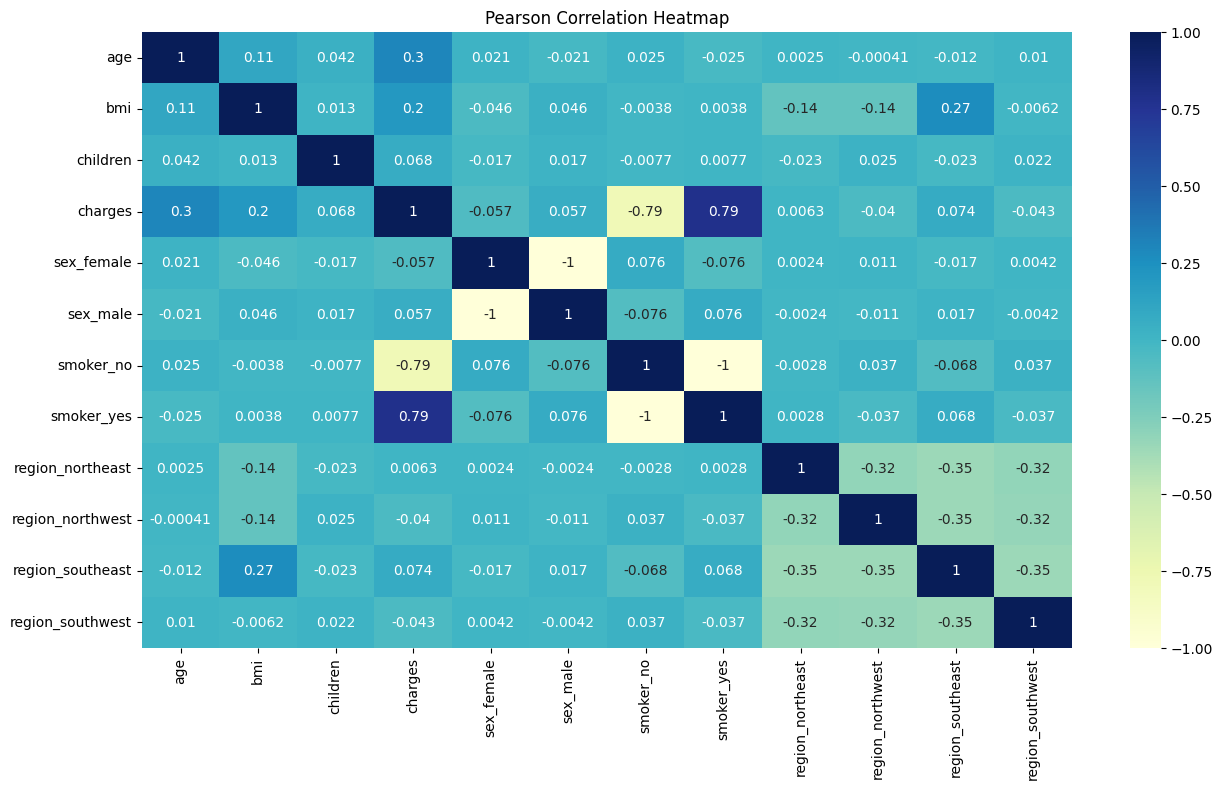

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [ ]:
# Assuming df is your DataFrame
# Define features (X) and target (y)
X = df[['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
        'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']

# Get the feature names
feature_names = X.columns.tolist()

# Compute Pearson Correlation Coefficients (PCC)
correlations = {}
for feature_name in feature_names:
    feature_data = X[feature_name]
    pcc, _ = pearsonr(feature_data, y)
    correlations[feature_name] = pcc

# Print PCC values
print("Pearson Correlation Coefficients:")
for feature, pcc in correlations.items():
    print(f"{feature}: {pcc:.2f}")

Pearson Correlation Coefficients:
age: 0.30
bmi: 0.20
children: 0.07
sex_female: -0.06
sex_male: 0.06
smoker_no: -0.79
smoker_yes: 0.79
region_northeast: 0.01
region_northwest: -0.04
region_southeast: 0.07
region_southwest: -0.04


A strong correlation is observed with the smoking and charges for patient.
Also a strong correlation for age,bmi,children,sex_male and smoker_yes, region_northwest, region_southeast,region_southwest exists.

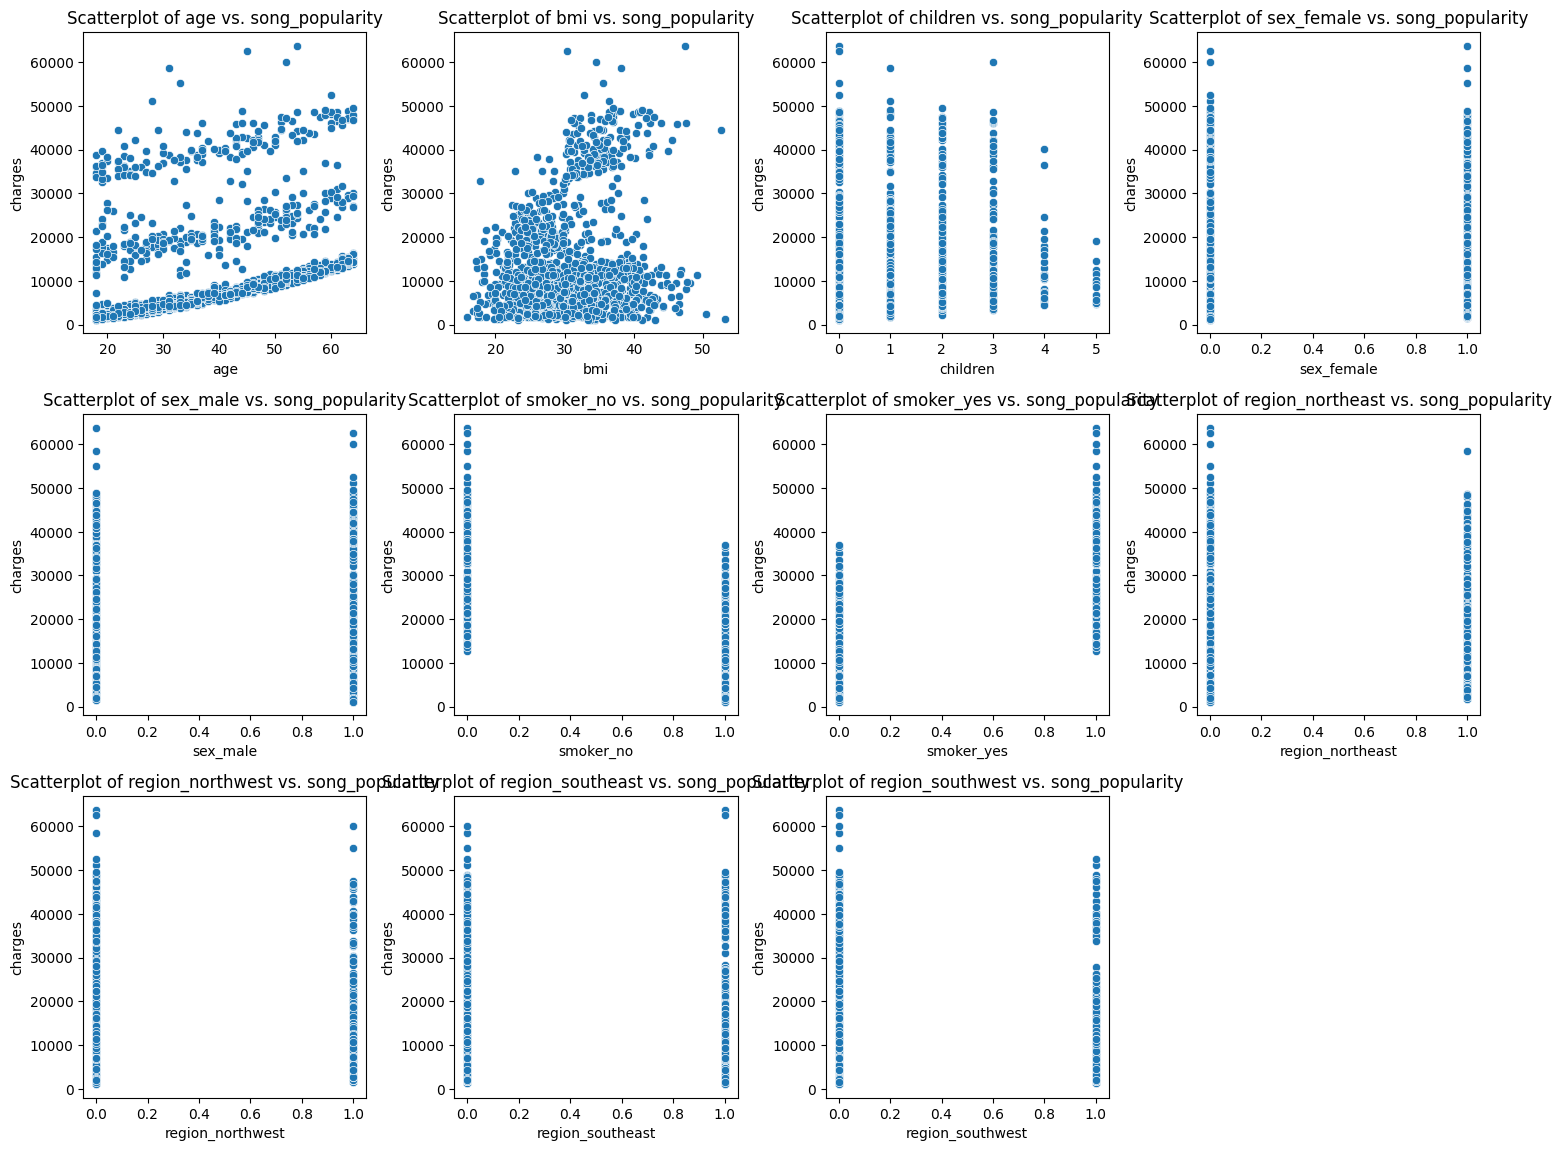

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = df[['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
        'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']

# Get the feature names
feature_names = X.columns.tolist()

# Set up subplots for scatterplots
plt.figure(figsize=(15, 15))
for i, feature_name in enumerate(feature_names, 1):
    plt.subplot(4, 4, i)  # 4x4 grid for 13 features
    sns.scatterplot(x=X[feature_name], y=y)
    plt.title(f'Scatterplot of {feature_name} vs. song_popularity')

plt.tight_layout()
plt.show()

D. Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

Standardizing the features, you ensure that they have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of columns to standardize
columns_to_standardize = [
    'age', 'bmi', 'children', 'sex_male', 'smoker_yes',
    'region_northwest', 'region_southeast', 'region_southwest'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Now, 'df' contains the standardized columns


In [ ]:
X = df[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
    'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (1070, 8) (1070,)
Test set shape: (268, 8) (268,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Check the sizes of the training and testing sets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 1070
Testing set size: 268


In [ ]:
# Check summary statistics for the training set
print("Summary Statistics for Training Set:")
print(X_train.describe())
print("---------------------------------------------------------------------")
# Check summary statistics for the testing set
print("\nSummary Statistics for Testing Set:")
print(X_test.describe())

Summary Statistics for Training Set:
               age          bmi     children     sex_male   smoker_yes  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean      0.010679    -0.016897     0.010422     0.013836     0.002042   
std       1.002083     0.991384     1.009080     1.000227     1.001959   
min      -1.509965    -2.412011    -0.908614    -1.010519    -0.507463   
25%      -0.869155    -0.731375    -0.908614    -1.010519    -0.507463   
50%       0.020860    -0.074377    -0.078767     0.989591    -0.507463   
75%       0.839674     0.628758     0.751079     0.989591    -0.507463   
max       1.765289     3.685522     3.240619     0.989591     1.970587   

       region_northwest  region_southeast  region_southwest  
count       1070.000000       1070.000000       1070.000000  
mean          -0.008506         -0.016992          0.008929  
std            0.995316          0.991575          1.005769  
min           -0.566418         -0.611324       

We summarize the statistics for both sets, which allows us to compare their properties. And as the properties are reasonably similar, it helps to indicate that the test set is representative of the entire dataset.

D. Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.

In [ ]:
# Create and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

lregmodel=linear_reg.fit(X_train, y_train)
# Print the Linear Regression model summary
print("Linear Regression Model Summary:")
print(f"Intercept: {linear_reg.intercept_}")
print(f"Coefficients: {linear_reg.coef_}")

Linear Regression Model Summary:
Intercept: 13314.335941867357
Coefficients: [ 3.60914902e+03  2.05488506e+03  5.12478869e+02 -9.29533694e+00
  9.54425109e+03 -1.58959435e+02 -2.92759080e+02 -3.47270359e+02]


The intercept represents the value of the predicted target variable when all feature values are zero, and the coefficients represent the weights assigned to each feature by the model.

In [ ]:
from sklearn.model_selection import KFold, learning_curve, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
reg = LinearRegression().fit(X_train,y_train)

reg_cv = cross_validate(reg,
                        X_train,
                        y_train,
                        scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'],
                        cv=4, return_train_score=True)
# Let's Look at the output from k fold
print("Linear Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format (np.mean(reg_cv[ 'train_r2'])))
print("\t Validation loss: {:,.3f}".format (np.mean (reg_cv['test_r2'])))

print ("\n For metric Root mean Squared Error (RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format (-np.mean (reg_cv['test_neg_root_mean_squared_error'])))

print("\n For metric Mean Absolute Error (MAE) :")
print("\t Training loss: {:,.3f}".format (-np.mean (reg_cv[ 'train_neg_mean_absolute_error' ])))
print("\t Validation loss: {:,.3f}".format (-np.mean (reg_cv['test_neg_mean_absolute_error'])))

Linear Regression: 

 For metric R^2 :
	 Training loss: 0.742
	 Validation loss: 0.728

 For metric Root mean Squared Error (RMSE) :
	 Training loss: 6,096.904
	 Validation loss: 6,158.485

 For metric Mean Absolute Error (MAE) :
	 Training loss: 4,200.922
	 Validation loss: 4,245.804


In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(lregmodel,
                                                         X_train,
                                                         y_train,
                                                         train_sizes=np.linspace (0.1, 1.0,10),
                                                         cv=4,
                                                         scoring="neg_root_mean_squared_error")
train_err=-train_scores.mean(axis=1)
valid_err=-valid_scores.mean(axis=1)

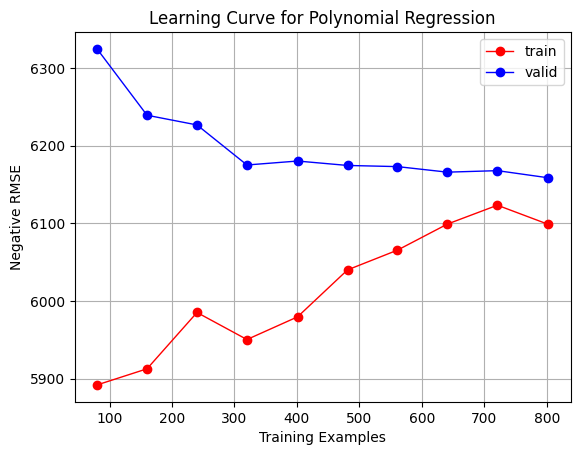

In [ ]:

plt.plot(train_sizes, train_err, "r-o", linewidth=1, label="train")

plt.plot(train_sizes, valid_err,"b-o", linewidth=1 , label="valid")

plt.xlabel("Training Examples")
plt.ylabel("Negative RMSE")
plt.title("Learning Curve for Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()


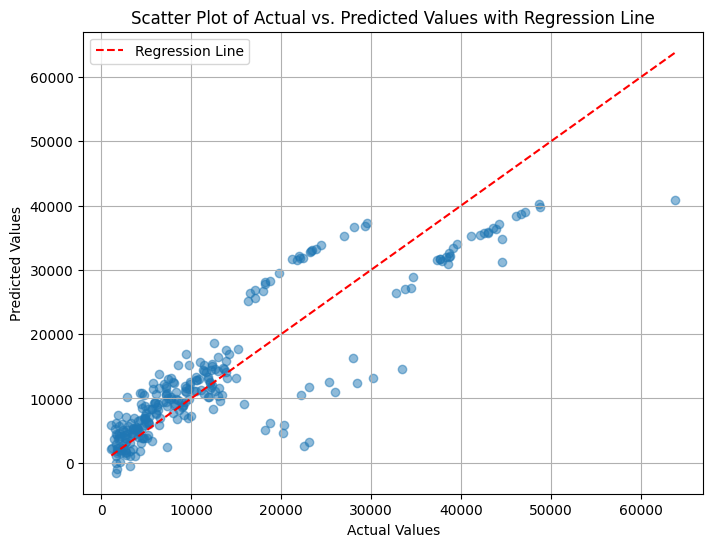

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Fit the Linear Regression model on the entire training data
linear_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test)

# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values with Regression Line")

# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Scatter Plot of Actual vs. Predicted Values")
# plt.grid(True)
# # plt.show()

# Create a regression line
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  # A simple identity line for the regression line

plt.plot(x_line, y_line, color='red', linestyle='--', label='Regression Line')
plt.legend()

plt.grid(True)
plt.show()


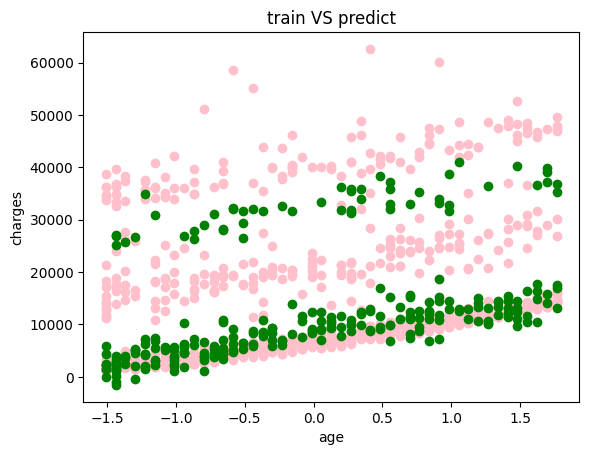

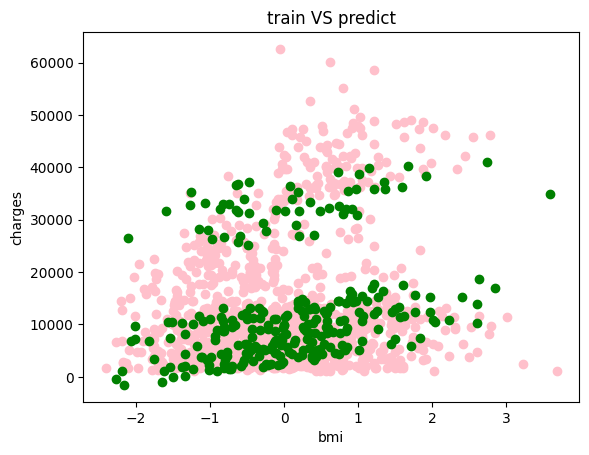

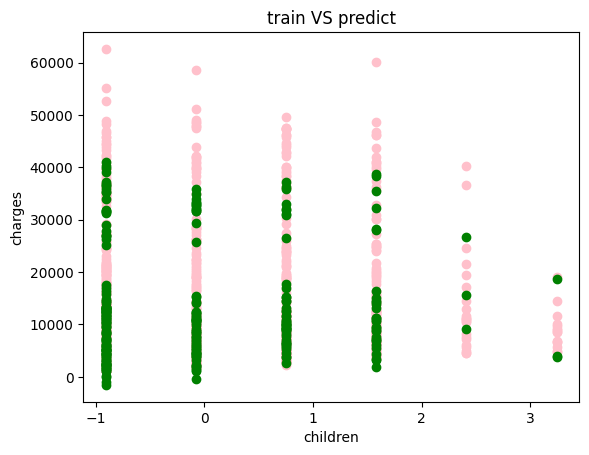

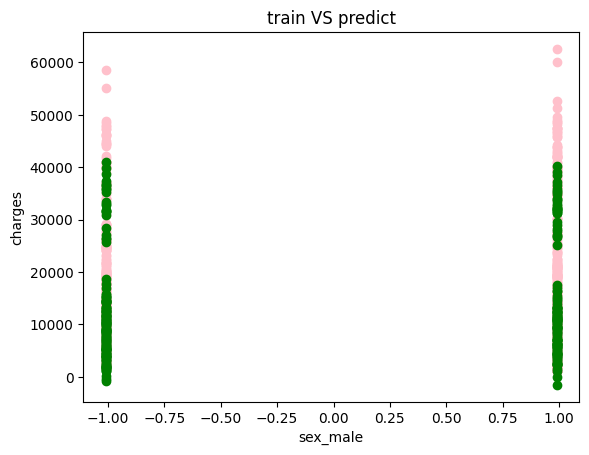

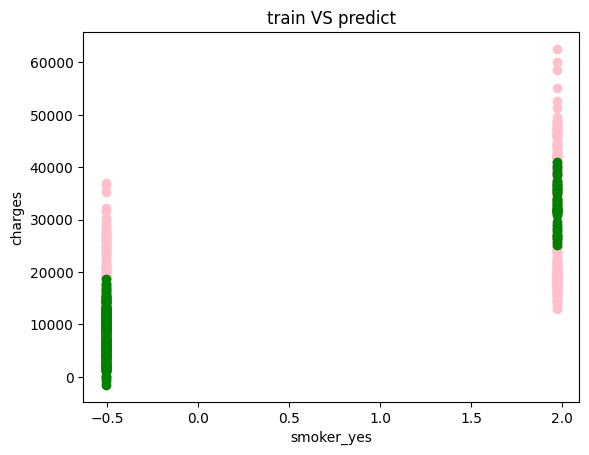

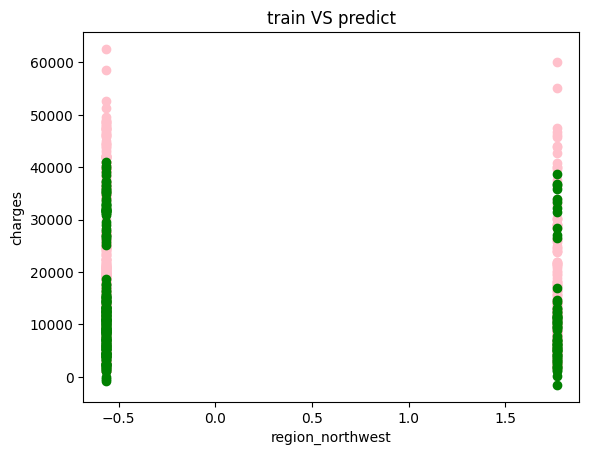

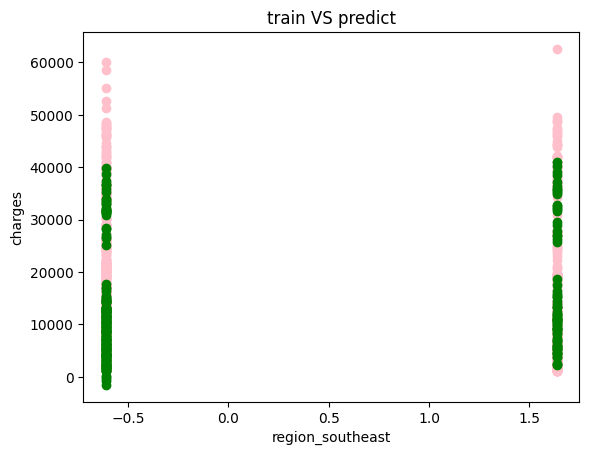

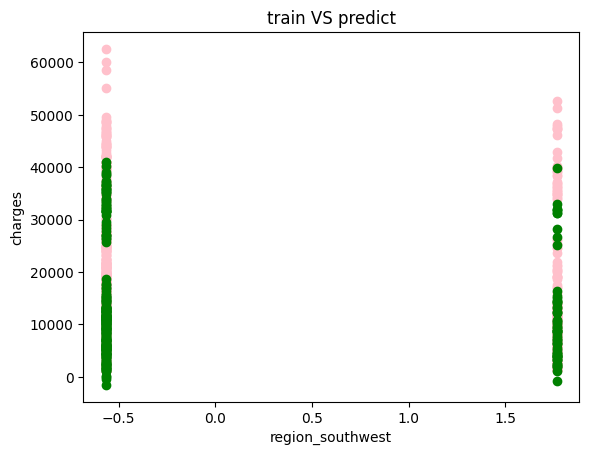

In [ ]:
for i in X_train.columns:
    plt.scatter(X_train[i], y_train, color="pink")
    plt.scatter(X_test[i], y_pred, color="green")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"charges")
    plt.show()

Linear Model using K-Fold with Normal Equation



In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Function to compute model parameters using the Normal Equation
def compute_normal_equation(X, y):
    X_transpose = np.transpose(X)
    theta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
    return theta

# Compute the model parameters using the Normal Equation
X_train_extended = np.column_stack((np.ones(len(X_train)), X_train))  # Add a column of ones for the intercept term
theta = compute_normal_equation(X_train_extended, y_train)

# Make predictions on the training data
y_train_pred = X_train_extended @ theta

# Calculate the residuals (errors) on the training data
residuals = y_train - y_train_pred

# Calculate the mean absolute error (MAE), root mean squared error (RMSE), and mean squared error (MSE)
mae = np.mean(np.abs(residuals))
rmse = np.sqrt(np.mean(residuals ** 2))
mse = np.mean(residuals ** 2)

# Define the scoring metrics (MAE, RMSE, and MSE) for cross-validation
scoring = {
    'MAE': make_scorer(lambda y_true, y_pred: -mae, greater_is_better=False),
    'RMSE': make_scorer(lambda y_true, y_pred: -rmse, greater_is_better=False),
    'MSE': make_scorer(lambda y_true, y_pred: -mse, greater_is_better=False)
}

# Perform four-fold cross-validation with MAE, RMSE, and MSE as the scoring metrics on the training data
cross_val_results = cross_validate(linear_reg, X_train, y_train, cv=4, scoring=scoring)

# Extract and calculate the mean MAE, RMSE, and MSE across the four folds (convert to positive values for MAE and RMSE)
mean_mae = np.abs(np.mean(cross_val_results['test_MAE']))
mean_rmse = np.abs(np.mean(cross_val_results['test_RMSE']))
mean_mse = np.abs(np.mean(cross_val_results['test_MSE']))

# Print the mean MAE, RMSE, and MSE as the evaluation metrics for each fold
print(f"Mean Absolute Error (MAE) with 4-fold cross-validation: {mean_mae}")
print(f"Root Mean Squared Error (RMSE) with 4-fold cross-validation: {mean_rmse}")
print(f"Mean Squared Error (MSE) with 4-fold cross-validation: {mean_mse}")

Mean Absolute Error (MAE) with 4-fold cross-validation: 4208.23457249223
Root Mean Squared Error (RMSE) with 4-fold cross-validation: 6105.545160099847
Mean Squared Error (MSE) with 4-fold cross-validation: 37277681.70201866


2.  Linear Model using K-Fold with SGD form



In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Create an SGDRegressor model
sgd_reg = SGDRegressor()

# Define the scoring metrics (MAE, RMSE, and MSE)
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'RMSE': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# Perform K-Fold cross-validation (e.g., 4-fold) with MAE, RMSE, and MSE as the scoring metrics on the training data
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cross_val_results = cross_validate(sgd_reg, X_train, y_train, cv=kf, scoring=scoring)

# Extract and calculate the mean MAE, RMSE, and MSE across the K folds (convert to positive values for MAE and RMSE)
mean_mae = -np.mean(cross_val_results['test_MAE'])
mean_rmse = -np.mean(cross_val_results['test_RMSE'])
mean_mse = -np.mean(cross_val_results['test_MSE'])

# Print the mean MAE, RMSE, and MSE as the evaluation metrics for each fold
print(f"Mean Absolute Error (MAE) with {kf.n_splits}-fold cross-validation: {mean_mae}")
print(f"Root Mean Squared Error (RMSE) with {kf.n_splits}-fold cross-validation: {mean_rmse}")
print(f"Mean Squared Error (MSE) with {kf.n_splits}-fold cross-validation: {mean_mse}")


Mean Absolute Error (MAE) with 4-fold cross-validation: 4234.810667408034
Root Mean Squared Error (RMSE) with 4-fold cross-validation: -6145.555337811143
Mean Squared Error (MSE) with 4-fold cross-validation: 37905579.535341576


The code initializes an SGDRegressor model with appropriate parameters. The model is fitted to the training data. Predictions are made on the test data. Evaluation metrics, including mean squared error (MSE) and R-squared (R2), are calculated and printed.

SGD with lr=0.01 and batch_size=32: Train RMSE=39132635.83854983, Val RMSE=36269638.807490684
SGD with lr=0.01 and batch_size=64: Train RMSE=38205829.27858569, Val RMSE=34185939.128173344
SGD with lr=0.01 and batch_size=128: Train RMSE=38929526.5961211, Val RMSE=33327799.52566554
SGD with lr=0.01 and batch_size=256: Train RMSE=37837631.19681633, Val RMSE=33574399.82505272
SGD with lr=0.02 and batch_size=32: Train RMSE=38665252.193994336, Val RMSE=33351996.020759325
SGD with lr=0.02 and batch_size=64: Train RMSE=39055416.52529216, Val RMSE=34504951.546699554
SGD with lr=0.02 and batch_size=128: Train RMSE=47451818.83657756, Val RMSE=48809594.71374482
SGD with lr=0.02 and batch_size=256: Train RMSE=41086241.45184665, Val RMSE=39074867.614908904
SGD with lr=0.05 and batch_size=32: Train RMSE=63722531.838065244, Val RMSE=56609388.322939575
SGD with lr=0.05 and batch_size=64: Train RMSE=50737314.577235095, Val RMSE=44380493.824579395
SGD with lr=0.05 and batch_size=128: Train RMSE=48937457.

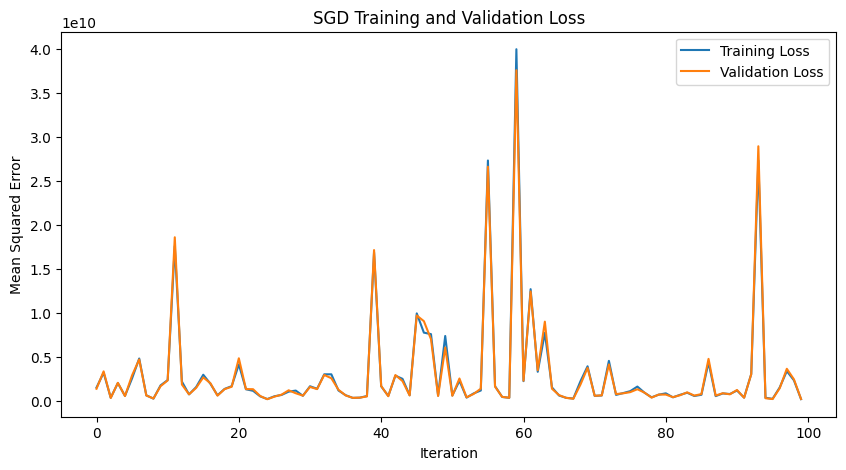

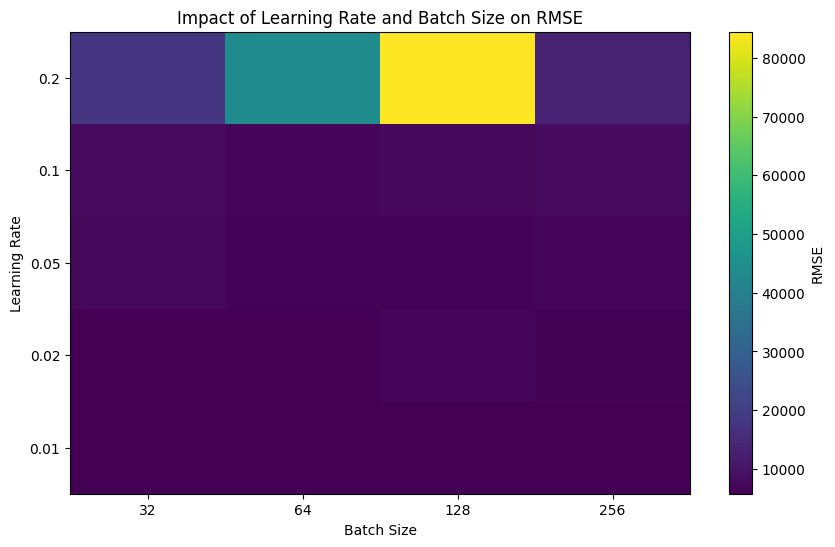

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

learning_rates = [0.01, 0.02, 0.05, 0.1, 0.2]
batch_sizes = [32, 64, 128, 256]
min_val_loss, min_train_loss = 10, 10

# Initialize dictionaries to store RMSE values
rmse_values = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        sgd_reg = SGDRegressor(
            max_iter=1000, tol=1e-3, learning_rate='constant', eta0=lr, penalty=None, random_state=42
        )

        # Initialize training and validation loss lists
        sgd_train_loss_history = []
        sgd_val_loss_history = []

        for epoch in range(100):
            # Create mini-batches by shuffling and splitting the training data
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            for start in range(0, X_train.shape[0], batch_size):
                batch_indices = indices[start:start + batch_size]
                X_batch = X_train.iloc[batch_indices]
                y_batch = y_train.iloc[batch_indices]

                sgd_reg.partial_fit(X_batch, y_batch)

            # Calculate training and validation loss
            train_loss = mean_squared_error(y_train, sgd_reg.predict(X_train))
            val_loss = mean_squared_error(y_test, sgd_reg.predict(X_test))
            sgd_train_loss_history.append(train_loss)
            sgd_val_loss_history.append(val_loss)

        # Store RMSE values in the dictionary
        rmse_values[(lr, batch_size)] = np.sqrt(val_loss)

        # Print RMSE values
        print(f"SGD with lr={lr} and batch_size={batch_size}: Train RMSE={train_loss}, Val RMSE={val_loss}")

# Plot SGD training and validation loss
print('min_val_loss', min_val_loss)
print('min_train_loss', min_train_loss)
plt.figure(figsize=(10, 5))
plt.plot(range(len(sgd_train_loss_history)), sgd_train_loss_history, label='Training Loss')
plt.plot(range(len(sgd_val_loss_history)), sgd_val_loss_history, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('SGD Training and Validation Loss')
plt.show()

# Create a heatmap to visualize RMSE values
rmse_matrix = np.zeros((len(learning_rates), len(batch_sizes)))
for i, lr in enumerate(learning_rates):
    for j, batch_size in enumerate(batch_sizes):
        rmse_matrix[i, j] = rmse_values[(lr, batch_size)]

plt.figure(figsize=(10, 6))
plt.imshow(rmse_matrix, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='RMSE')
plt.title('Impact of Learning Rate and Batch Size on RMSE')
plt.xlabel('Batch Size')
plt.ylabel('Learning Rate')
plt.xticks(np.arange(len(batch_sizes)), batch_sizes)
plt.yticks(np.arange(len(learning_rates)), learning_rates)
plt.show()


In [ ]:
alphas = [0.01, 0.1, 1.0,5.0,10,100,1000,10000]
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg_scores = cross_val_score(ridge_reg, X_train, y_train, cv=KFold(n_splits=4), scoring='neg_mean_squared_error')
    ridge_reg_rmse = np.sqrt(-ridge_reg_scores.mean())
    print(f"Ridge Regression (alpha={alpha}) RMSE: {ridge_reg_rmse}")

    lasso_reg = Lasso(alpha=alpha)
    lasso_reg_scores = cross_val_score(lasso_reg, X_train, y_train, cv=KFold(n_splits=4), scoring='neg_mean_squared_error')
    lasso_reg_rmse = np.sqrt(-lasso_reg_scores.mean())
    print(f"Lasso Regression (alpha={alpha}) RMSE: {lasso_reg_rmse}")

    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net_scores = cross_val_score(elastic_net, X_train, y_train, cv=KFold(n_splits=4), scoring='neg_mean_squared_error')
    elastic_net_rmse = np.sqrt(-elastic_net_scores.mean())
    print(f"Elastic Net (alpha={alpha}) RMSE: {elastic_net_rmse}")
    print(f"---------")


Ridge Regression (alpha=0.01) RMSE: 6163.054594187415
Lasso Regression (alpha=0.01) RMSE: 6163.054184483633
Elastic Net (alpha=0.01) RMSE: 6163.256685989137
---------
Ridge Regression (alpha=0.1) RMSE: 6163.054101146913
Lasso Regression (alpha=0.1) RMSE: 6163.049884034447
Elastic Net (alpha=0.1) RMSE: 6183.905859226757
---------
Ridge Regression (alpha=1.0) RMSE: 6163.062170512846
Lasso Regression (alpha=1.0) RMSE: 6163.008037963156
Elastic Net (alpha=1.0) RMSE: 7091.236202835592
---------
Ridge Regression (alpha=5.0) RMSE: 6163.380134676561
Lasso Regression (alpha=5.0) RMSE: 6162.847152101566
Elastic Net (alpha=5.0) RMSE: 9638.341564199376
---------
Ridge Regression (alpha=10) RMSE: 6164.407969287236
Lasso Regression (alpha=10) RMSE: 6162.704056394322
Elastic Net (alpha=10) RMSE: 10598.32641245902
---------
Ridge Regression (alpha=100) RMSE: 6274.925567476542
Lasso Regression (alpha=100) RMSE: 6161.204649954373
Elastic Net (alpha=100) RMSE: 11851.051857567192
---------
Ridge Regressio

Here we are performing Ridge, Lasso, and Elastic Net regularization with varying alpha values. For each alpha value, Ridge, Lasso, and Elastic Net models are created and cross-validated. The root mean squared error (RMSE) is computed for each model, and the results are printed.

Based on the RMSE values for different alpha values for Ridge, Lasso, and Elastic Net regression, we can draw the following conclusions:

1. Ridge Regression:

For larger alpha values (e.g., 100, 1000, 10000), the RMSE increases significantly, indicating that stronger regularization leads to worse model performance.

2. Lasso Regression:

Similar to Ridge, for very small alpha values (e.g., 0.01, 0.1, 1.0), the RMSE remains relatively stable at around 6163.
However, Lasso seems to be slightly better at feature selection, as indicated by slightly lower RMSE values compared to Ridge.
For larger alpha values, Lasso also experiences an increase in RMSE, indicating that stronger regularization negatively impacts performance.

3. Elastic Net Regression:

Elastic Net combines L1 (Lasso) and L2 (Ridge) regularization, and its behavior falls between the two.
For small alpha values (e.g., 0.01, 0.1, 1.0), the RMSE is competitive with Ridge and Lasso.
However, for larger alpha values, Elastic Net's RMSE increases significantly, similar to Ridge and Lasso.
Conclusion:

Here, it appears that very small alpha values (e.g., 0.01, 0.1, 1.0) result in the best performance for Ridge, Lasso, and Elastic Net, with RMSE values around 6163.
Both Ridge and Lasso show similar performance, with Lasso slightly better at feature selection.
Stronger regularization (large alpha values) leads to worse model performance for all three methods.
It's recommended to choose alpha values around 0.01 to achieve the best balance between regularization and model fit for this dataset.

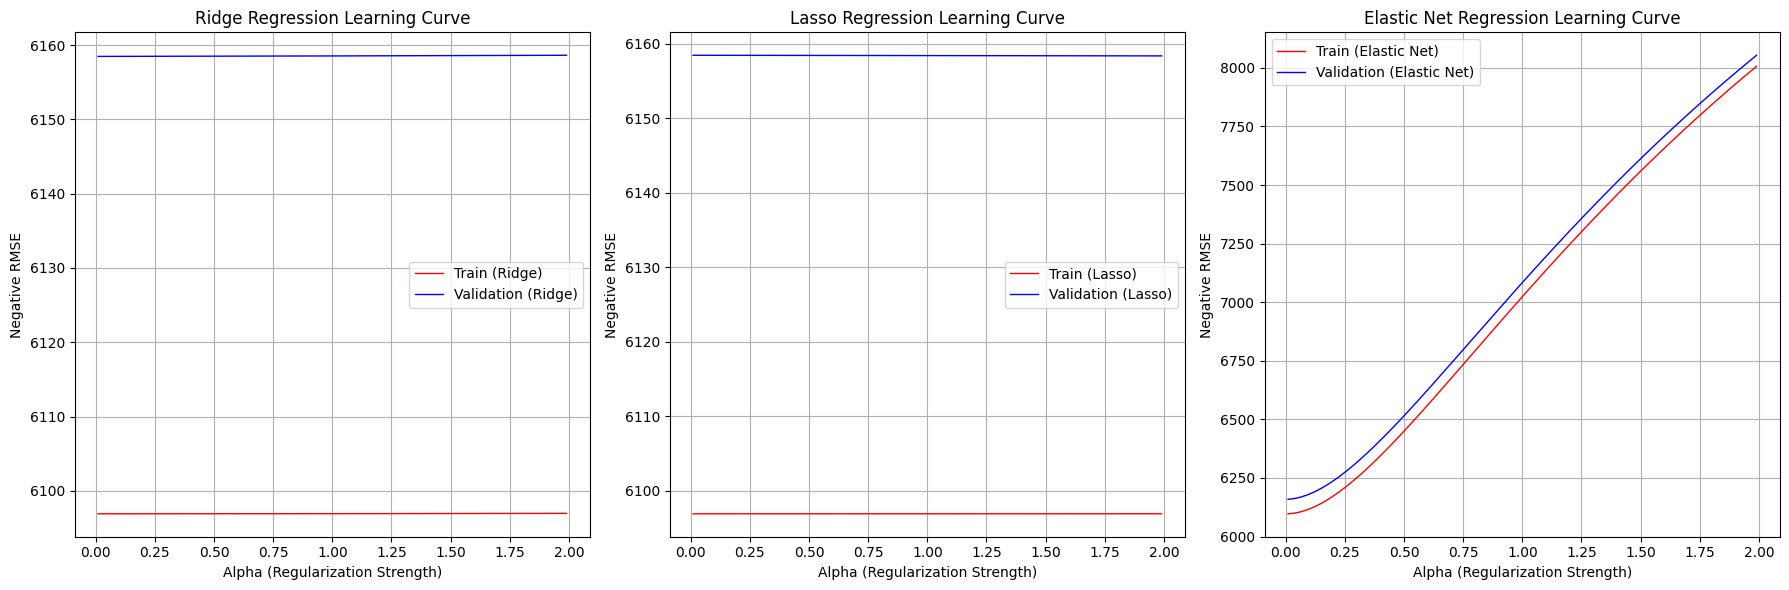

Best Alpha for Ridge: 0.01
Best Alpha for Lasso: 1.99
Best Alpha for Elastic Net: 0.01


In [ ]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Hyperparameter tuning for Ridge
ridge_alphas = np.arange(0.01, 2, 0.01)
ridge_reg_training_loss = []
ridge_reg_validation_loss = []
ridge_best_alpha = None
ridge_best_loss = float('inf')

# Hyperparameter tuning for Lasso
lasso_alphas = np.arange(0.01, 2, 0.01)
lasso_reg_training_loss = []
lasso_reg_validation_loss = []
lasso_best_alpha = None
lasso_best_loss = float('inf')

# Hyperparameter tuning for Elastic Net
elastic_alphas = np.arange(0.01, 2, 0.01)
elastic_reg_training_loss = []
elastic_reg_validation_loss = []
elastic_best_alpha = None
elastic_best_loss = float('inf')

for alpha_value in ridge_alphas:
    ridge_reg = Ridge(alpha=alpha_value, solver="cholesky")
    ridge_reg_cv = cross_validate(ridge_reg,
                                  X_train,
                                  y_train,
                                  scoring='neg_root_mean_squared_error',
                                  cv=4,
                                  return_train_score=True)

    training_loss = -np.mean(ridge_reg_cv['train_score'])
    validation_loss = -np.mean(ridge_reg_cv['test_score'])

    ridge_reg_training_loss.append(training_loss)
    ridge_reg_validation_loss.append(validation_loss)

    if validation_loss < ridge_best_loss:
        ridge_best_loss = validation_loss
        ridge_best_alpha = alpha_value

for alpha_value in lasso_alphas:
    lasso_reg = Lasso(alpha=alpha_value)
    lasso_reg_cv = cross_validate(lasso_reg,
                                  X_train,
                                  y_train,
                                  scoring='neg_root_mean_squared_error',
                                  cv=4,
                                  return_train_score=True)

    training_loss = -np.mean(lasso_reg_cv['train_score'])
    validation_loss = -np.mean(lasso_reg_cv['test_score'])

    lasso_reg_training_loss.append(training_loss)
    lasso_reg_validation_loss.append(validation_loss)

    if validation_loss < lasso_best_loss:
        lasso_best_loss = validation_loss
        lasso_best_alpha = alpha_value

for alpha_value in elastic_alphas:
    elastic_reg = ElasticNet(alpha=alpha_value, l1_ratio=0.5)  # You can adjust the l1_ratio as needed
    elastic_reg_cv = cross_validate(elastic_reg,
                                    X_train,
                                    y_train,
                                    scoring='neg_root_mean_squared_error',
                                    cv=4,
                                    return_train_score=True)

    training_loss = -np.mean(elastic_reg_cv['train_score'])
    validation_loss = -np.mean(elastic_reg_cv['test_score'])

    elastic_reg_training_loss.append(training_loss)
    elastic_reg_validation_loss.append(validation_loss)

    if validation_loss < elastic_best_loss:
        elastic_best_loss = validation_loss
        elastic_best_alpha = alpha_value

# Plotting the learning curves for Ridge, Lasso, and Elastic Net
plt.figure(figsize=(18, 6))

# Ridge plot
plt.subplot(1, 3, 1)
plt.plot(ridge_alphas, ridge_reg_training_loss, "r-", linewidth=1, label="Train (Ridge)")
plt.plot(ridge_alphas, ridge_reg_validation_loss, "b-", linewidth=1, label="Validation (Ridge)")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Negative RMSE")
plt.title("Ridge Regression Learning Curve")
plt.legend()
plt.grid()

# Lasso plot
plt.subplot(1, 3, 2)
plt.plot(lasso_alphas, lasso_reg_training_loss, "r-", linewidth=1, label="Train (Lasso)")
plt.plot(lasso_alphas, lasso_reg_validation_loss, "b-", linewidth=1, label="Validation (Lasso)")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Negative RMSE")
plt.title("Lasso Regression Learning Curve")
plt.legend()
plt.grid()

# Elastic Net plot
plt.subplot(1, 3, 3)
plt.plot(elastic_alphas, elastic_reg_training_loss, "r-", linewidth=1, label="Train (Elastic Net)")
plt.plot(elastic_alphas, elastic_reg_validation_loss, "b-", linewidth=1, label="Validation (Elastic Net)")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Negative RMSE")
plt.title("Elastic Net Regression Learning Curve")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

print(f"Best Alpha for Ridge: {ridge_best_alpha}")
print(f"Best Alpha for Lasso: {lasso_best_alpha}")
print(f"Best Alpha for Elastic Net: {elastic_best_alpha}")

F. Repeat the previous step with polynomial regression.
Using validation loss, explore if your model overfits/underfits the data. [10 points]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2)

# Transform the features to polynomial features
X_train_poly = poly.fit_transform(X_train)

# Create and fit the Linear Regression model on the polynomial features
linear_reg_poly = LinearRegression()
linear_reg_poly.fit(X_train_poly, y_train)

# Print the Polynomial Regression model summary
print("Polynomial Regression Model Summary:")
print(f"Intercept: {linear_reg_poly.intercept_}")
print(f"Coefficients: {linear_reg_poly.coef_}")


Polynomial Regression Model Summary:
Intercept: -2.4250250957788884e+16
Coefficients: [-2.23139437e+12  3.60384048e+03  1.97223627e+03  8.82245202e+02
  1.56135731e+13  5.14342830e+15 -1.43174223e+16 -1.10518439e+16
 -8.62970101e+15  7.84482774e+02  5.45056029e+01 -1.22546327e+02
  1.28230932e+02  1.78703529e+01  1.48097481e+02  3.14669044e+02
  3.66321417e+02 -2.60466791e+02  5.86572631e+01  5.25897088e+01
  3.62945769e+03 -6.69690792e+01 -3.33230125e+02 -2.49314901e+02
 -1.24431240e+02 -1.48500450e+02 -2.13558572e+02  2.05335178e+00
 -2.19455980e+02 -3.23509782e+02  7.46064899e+14  5.10132834e+01
  2.76744813e+02  3.36927524e+02  1.39259556e+02 -3.51537528e+15
 -1.09103114e+02 -1.64246124e+02  2.41347604e+02  1.49084333e+16
  3.44262696e+15  2.56731043e+15  7.31101453e+15 -9.73113180e+15
  3.44852607e+15]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define the degree of polynomial you want to use
degree = 2  # You can adjust this degree as needed

# Create a pipeline for polynomial regression
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the polynomial regression model
polyreg.fit(X_train, y_train)

# Perform cross-validation and evaluate the polynomial regression model
polyreg_cv = cross_validate(polyreg,
                            X_train,
                            y_train,
                            scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'],
                            cv=4, return_train_score=True)

# Print the results
print("Polynomial Regression (Degree {}):".format(degree))
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format (np.mean(polyreg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format (np.mean(polyreg_cv['test_r2'])))

print ("\n For metric Root mean Squared Error (RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(polyreg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format (-np.mean(polyreg_cv['test_neg_root_mean_squared_error'])))

print("\n For metric Mean Absolute Error (MAE) :")
print("\t Training loss: {:,.3f}".format (-np.mean(polyreg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format (-np.mean(polyreg_cv['test_neg_mean_absolute_error'])))


Polynomial Regression (Degree 2):

 For metric R^2 :
	 Training loss: 0.843
	 Validation loss: 0.825

 For metric Root mean Squared Error (RMSE) :
	 Training loss: 4,754.378
	 Validation loss: 4,937.595

 For metric Mean Absolute Error (MAE) :
	 Training loss: 2,890.008
	 Validation loss: 3,010.183


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(polyreg,
                                                         X_train,
                                                         y_train,
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         cv=4,
                                                         scoring="neg_root_mean_squared_error")

train_err = -train_scores.mean(axis=1)
valid_err = -valid_scores.mean(axis=1)


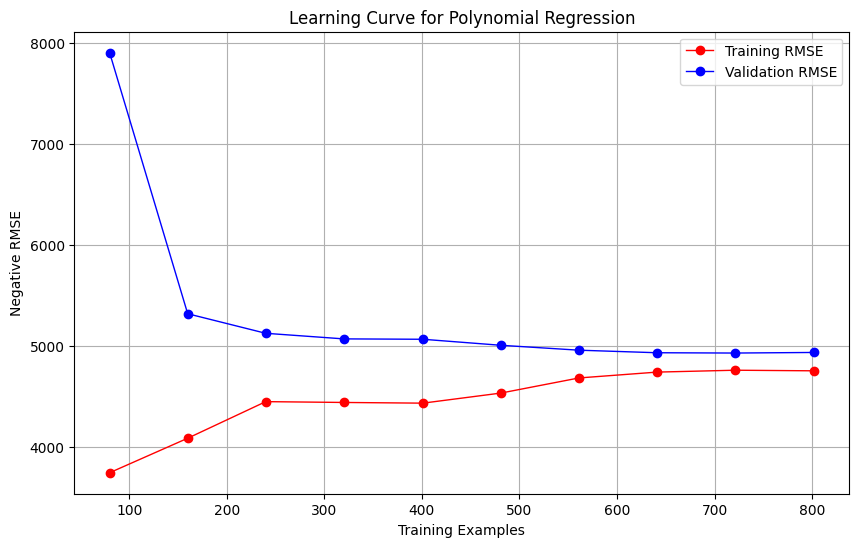

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_err, "r-o", linewidth=1, label="Training RMSE")
plt.plot(train_sizes, valid_err, "b-o", linewidth=1, label="Validation RMSE")
plt.xlabel("Training Examples")
plt.ylabel("Negative RMSE")
plt.title("Learning Curve for Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()


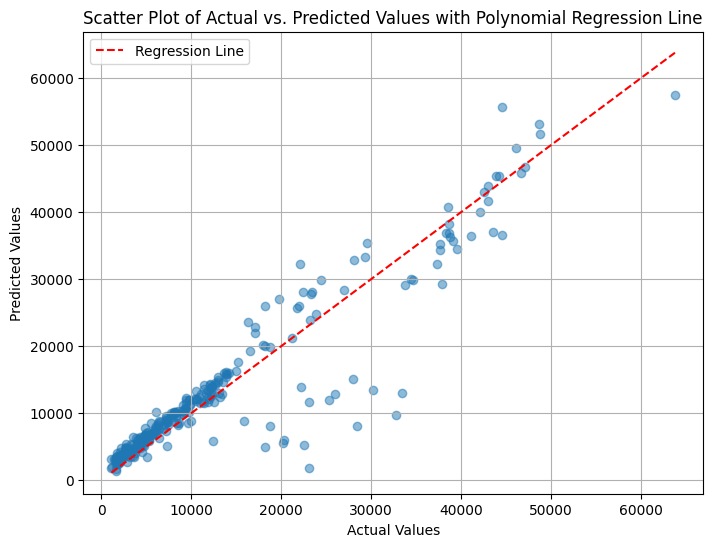

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the Polynomial Regression model on the entire training data
linear_reg_poly.fit(X_train_poly, y_train)

# Transform the testing features to polynomial features
X_test_poly = poly.transform(X_test)

# Make predictions on the testing data
y_pred = linear_reg_poly.predict(X_test_poly)

# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values with Polynomial Regression Line")

# Create a regression line
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line  # A simple identity line for the regression line

plt.plot(x_line, y_line, color='red', linestyle='--', label='Regression Line')
plt.legend()

plt.grid(True)
plt.show()


Polynomial Model using four-fold cross validation with Normal Equation

In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Function to compute model parameters using the Normal Equation
def compute_normal_equation(X, y):
    X_transpose = np.transpose(X)
    theta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
    return theta

# Compute the model parameters using the Normal Equation
X_train_extended = np.column_stack((np.ones(len(X_train)), X_train))  # Add a column of ones for the intercept term
theta = compute_normal_equation(X_train_extended, y_train)

# Make predictions on the training data
y_train_pred = X_train_extended @ theta

# Calculate the residuals (errors) on the training data
residuals = y_train - y_train_pred

# Calculate the mean absolute error (MAE), root mean squared error (RMSE), and mean squared error (MSE)
mae = np.mean(np.abs(residuals))
rmse = np.sqrt(np.mean(residuals ** 2))
mse = np.mean(residuals ** 2)

# Define the scoring metrics (MAE, RMSE, and MSE) for cross-validation
scoring = {
    'MAE': make_scorer(lambda y_true, y_pred: -mae, greater_is_better=False),
    'RMSE': make_scorer(lambda y_true, y_pred: -rmse, greater_is_better=False),
    'MSE': make_scorer(lambda y_true, y_pred: -mse, greater_is_better=False)
}

# Create a PolynomialFeatures transformer to add polynomial features
degree = 2  # You can adjust the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Perform four-fold cross-validation with MAE, RMSE, and MSE as the scoring metrics on the training data
kf = KFold(n_splits=4, shuffle=True, random_state=42)

cross_val_results = cross_validate(linear_reg, X_train_poly, y_train, cv=kf, scoring=scoring)

# Extract and calculate the mean MAE, RMSE, and MSE across the four folds (convert to positive values for MAE and RMSE)
mean_mae = np.abs(np.mean(cross_val_results['test_MAE']))
mean_rmse = np.abs(np.mean(cross_val_results['test_RMSE']))
mean_mse = np.abs(np.mean(cross_val_results['test_MSE']))

# Print the mean MAE, RMSE, and MSE as the evaluation metrics for each fold
print(f"Mean Absolute Error (MAE) with 4-fold cross-validation: {mean_mae}")
print(f"Root Mean Squared Error (RMSE) with 4-fold cross-validation: {mean_rmse}")
print(f"Mean Squared Error (MSE) with 4-fold cross-validation: {mean_mse}")


Mean Absolute Error (MAE) with 4-fold cross-validation: 4208.23457249223
Root Mean Squared Error (RMSE) with 4-fold cross-validation: 6105.545160099847
Mean Squared Error (MSE) with 4-fold cross-validation: 37277681.70201866


Polynomial Model using four-Fold with SGD

In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Create an SGDRegressor model
sgd_reg = SGDRegressor()

# Define the polynomial degree
degree = 2  # You can change this degree as needed

# Create a pipeline for polynomial regression
model = make_pipeline(PolynomialFeatures(degree), sgd_reg)

# Define the scoring metrics (MAE, RMSE, and MSE)
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'RMSE': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# Perform K-Fold cross-validation (e.g., 4-fold) with MAE, RMSE, and MSE as the scoring metrics on the training data
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cross_val_results = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring)

# Extract and calculate the mean MAE, RMSE, and MSE across the K folds (convert to positive values for MAE and RMSE)
mean_mae = -np.mean(cross_val_results['test_MAE'])
mean_rmse = -np.mean(cross_val_results['test_RMSE'])
mean_mse = -np.mean(cross_val_results['test_MSE'])

# Print the mean MAE, RMSE, and MSE as the evaluation metrics for each fold
print(f"Mean Absolute Error (MAE) with {kf.n_splits}-fold cross-validation: {mean_mae}")
print(f"Root Mean Squared Error (RMSE) with {kf.n_splits}-fold cross-validation: {mean_rmse}")
print(f"Mean Squared Error (MSE) with {kf.n_splits}-fold cross-validation: {mean_mse}")


Mean Absolute Error (MAE) with 4-fold cross-validation: 2970.440554627893
Root Mean Squared Error (RMSE) with 4-fold cross-validation: -4929.818209351771
Mean Squared Error (MSE) with 4-fold cross-validation: 24524614.360362742


SGD with lr=0.01 and batch_size=32: Train RMSE=29807063.928299215, Val RMSE=28072684.923256595
SGD with lr=0.01 and batch_size=64: Train RMSE=30294791.656816583, Val RMSE=25996416.961904142
SGD with lr=0.01 and batch_size=128: Train RMSE=33039139.3144773, Val RMSE=28083252.99643698
SGD with lr=0.01 and batch_size=256: Train RMSE=34216102.43424286, Val RMSE=32415826.038897067
SGD with lr=0.02 and batch_size=32: Train RMSE=99521347.80781578, Val RMSE=81032745.20079714
SGD with lr=0.02 and batch_size=64: Train RMSE=48706053.33263321, Val RMSE=52619997.187294215
SGD with lr=0.02 and batch_size=128: Train RMSE=70762664.49501319, Val RMSE=77690318.10676521
SGD with lr=0.02 and batch_size=256: Train RMSE=154373108.15399948, Val RMSE=151088120.1268073
SGD with lr=0.05 and batch_size=32: Train RMSE=1.891910217974212e+24, Val RMSE=1.815649126937361e+24
SGD with lr=0.05 and batch_size=64: Train RMSE=1.210196378510748e+24, Val RMSE=1.256066004913286e+24
SGD with lr=0.05 and batch_size=128: Train R

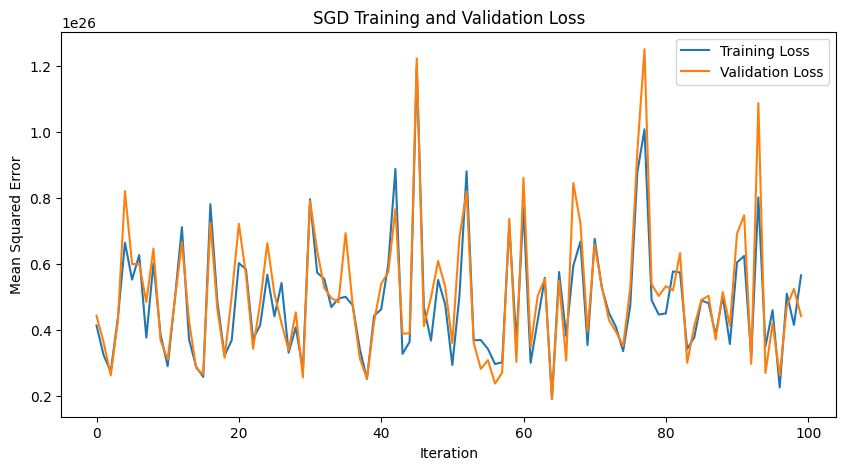

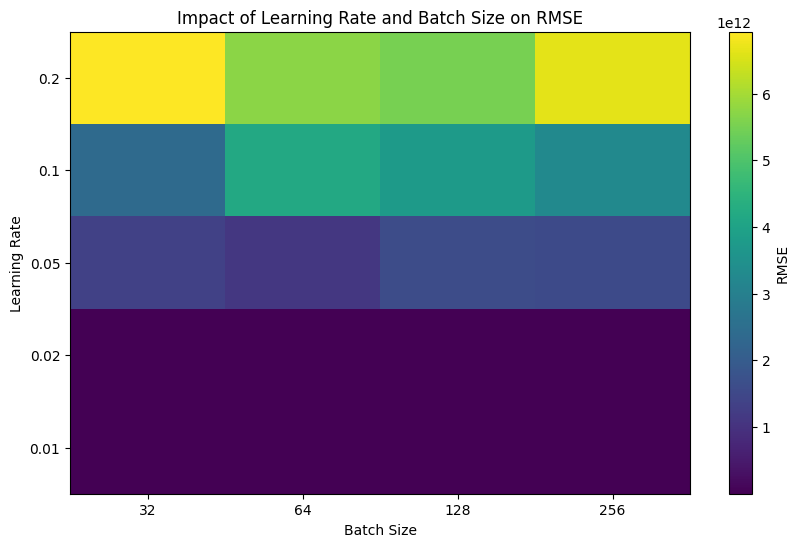

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

learning_rates = [0.01, 0.02, 0.05, 0.1, 0.2]
batch_sizes = [32, 64, 128, 256]
min_val_loss, min_train_loss = 10, 10

# Initialize dictionaries to store RMSE values
rmse_values = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        sgd_reg = SGDRegressor(
            max_iter=1000, tol=1e-3, learning_rate='constant', eta0=lr, penalty=None, random_state=42
        )

        # Initialize training and validation loss lists
        sgd_train_loss_history = []
        sgd_val_loss_history = []

        for epoch in range(100):
            # Create mini-batches by shuffling and splitting the training data
            indices = np.arange(X_train_poly.shape[0])
            np.random.shuffle(indices)
            for start in range(0, X_train_poly.shape[0], batch_size):
                batch_indices = indices[start:start + batch_size]
                X_batch = X_train_poly[batch_indices]
                y_batch = y_train.iloc[batch_indices]

                sgd_reg.partial_fit(X_batch, y_batch)

            # Calculate training and validation loss
            train_loss = mean_squared_error(y_train, sgd_reg.predict(X_train_poly))
            val_loss = mean_squared_error(y_test, sgd_reg.predict(X_test_poly))
            sgd_train_loss_history.append(train_loss)
            sgd_val_loss_history.append(val_loss)

        # Store RMSE values in the dictionary
        rmse_values[(lr, batch_size)] = np.sqrt(val_loss)

        # Print RMSE values
        print(f"SGD with lr={lr} and batch_size={batch_size}: Train RMSE={train_loss}, Val RMSE={val_loss}")

# Plot SGD training and validation loss
print('min_val_loss', min_val_loss)
print('min_train_loss', min_train_loss)
plt.figure(figsize=(10, 5))
plt.plot(range(len(sgd_train_loss_history)), sgd_train_loss_history, label='Training Loss')
plt.plot(range(len(sgd_val_loss_history)), sgd_val_loss_history, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('SGD Training and Validation Loss')
plt.show()

# Create a heatmap to visualize RMSE values
rmse_matrix = np.zeros((len(learning_rates), len(batch_sizes)))
for i, lr in enumerate(learning_rates):
    for j, batch_size in enumerate(batch_sizes):
        rmse_matrix[i, j] = rmse_values[(lr, batch_size)]

plt.figure(figsize=(10, 6))
plt.imshow(rmse_matrix, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='RMSE')
plt.title('Impact of Learning Rate and Batch Size on RMSE')
plt.xlabel('Batch Size')
plt.ylabel('Learning Rate')
plt.xticks(np.arange(len(batch_sizes)), batch_sizes)
plt.yticks(np.arange(len(learning_rates)), learning_rates)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.825e+09, tolerance: 1.161e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.153e+09, tolerance: 1.104e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.371e+09, tolerance: 1.241e

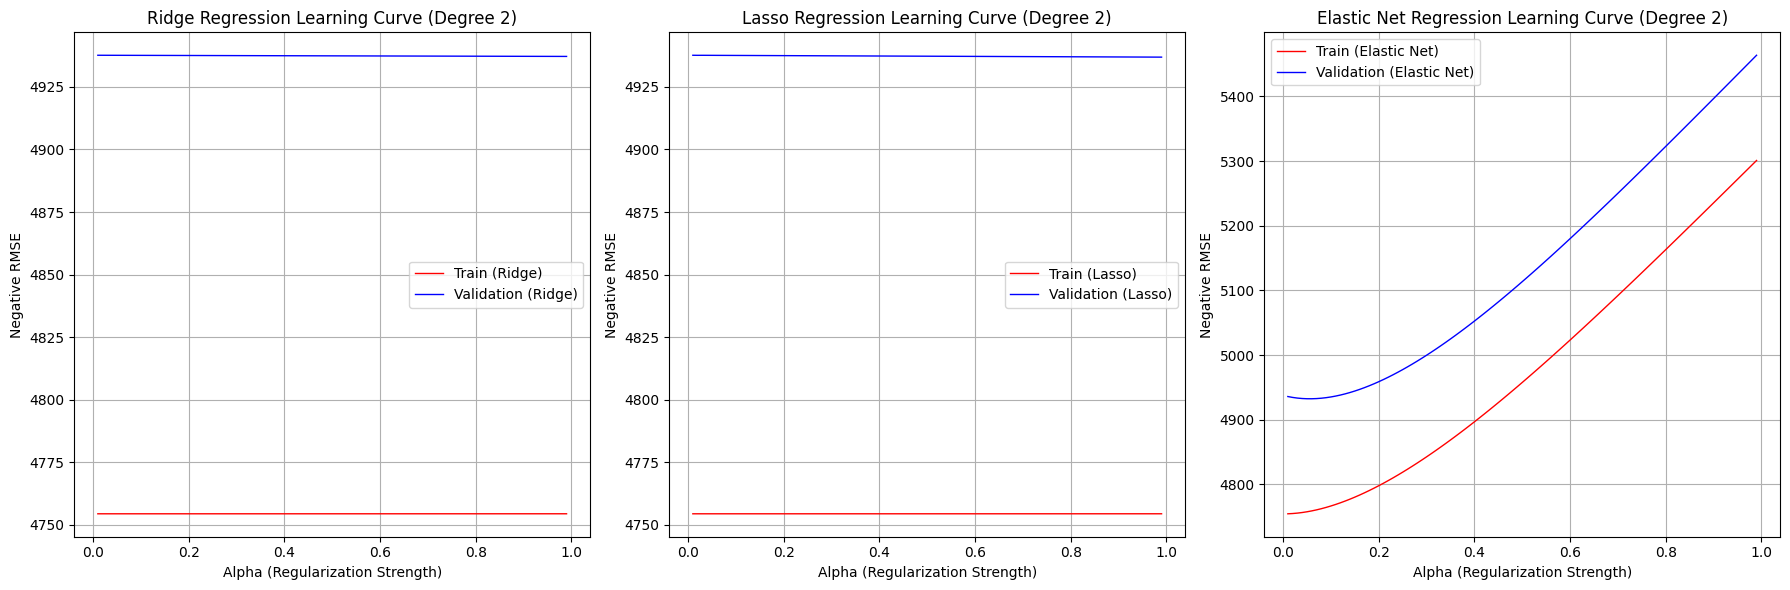

Best Alpha for Ridge: 0.99
Best Alpha for Lasso: 0.99
Best Alpha for Elastic Net: 0.060000000000000005


In [ ]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Hyperparameter tuning for Ridge
ridge_alphas = np.arange(0.01, 1, 0.01)
ridge_reg_training_loss = []
ridge_reg_validation_loss = []
ridge_best_alpha = None
ridge_best_loss = float('inf')

# Hyperparameter tuning for Lasso
lasso_alphas = np.arange(0.01, 1, 0.01)
lasso_reg_training_loss = []
lasso_reg_validation_loss = []
lasso_best_alpha = None
lasso_best_loss = float('inf')

# Hyperparameter tuning for Elastic Net
elastic_alphas = np.arange(0.01, 1, 0.01)
elastic_reg_training_loss = []
elastic_reg_validation_loss = []
elastic_best_alpha = None
elastic_best_loss = float('inf')

for alpha_value in ridge_alphas:
    ridge_reg = Ridge(alpha=alpha_value, solver="cholesky")
    ridge_reg_cv = cross_validate(ridge_reg,
                                  X_train_poly,  # Use polynomial features
                                  y_train,
                                  scoring='neg_root_mean_squared_error',
                                  cv=4,
                                  return_train_score=True)

    training_loss = -np.mean(ridge_reg_cv['train_score'])
    validation_loss = -np.mean(ridge_reg_cv['test_score'])

    ridge_reg_training_loss.append(training_loss)
    ridge_reg_validation_loss.append(validation_loss)

    if validation_loss < ridge_best_loss:
        ridge_best_loss = validation_loss
        ridge_best_alpha = alpha_value

for alpha_value in lasso_alphas:
    lasso_reg = Lasso(alpha=alpha_value)
    lasso_reg_cv = cross_validate(lasso_reg,
                                  X_train_poly,  # Use polynomial features
                                  y_train,
                                  scoring='neg_root_mean_squared_error',
                                  cv=4,
                                  return_train_score=True)

    training_loss = -np.mean(lasso_reg_cv['train_score'])
    validation_loss = -np.mean(lasso_reg_cv['test_score'])

    lasso_reg_training_loss.append(training_loss)
    lasso_reg_validation_loss.append(validation_loss)

    if validation_loss < lasso_best_loss:
        lasso_best_loss = validation_loss
        lasso_best_alpha = alpha_value

for alpha_value in elastic_alphas:
    elastic_reg = ElasticNet(alpha=alpha_value, l1_ratio=0.5)  # You can adjust the l1_ratio as needed
    elastic_reg_cv = cross_validate(elastic_reg,
                                    X_train_poly,  # Use polynomial features
                                    y_train,
                                    scoring='neg_root_mean_squared_error',
                                    cv=4,
                                    return_train_score=True)

    training_loss = -np.mean(elastic_reg_cv['train_score'])
    validation_loss = -np.mean(elastic_reg_cv['test_score'])

    elastic_reg_training_loss.append(training_loss)
    elastic_reg_validation_loss.append(validation_loss)

    if validation_loss < elastic_best_loss:
        elastic_best_loss = validation_loss
        elastic_best_alpha = alpha_value

# Plotting the learning curves for Ridge, Lasso, and Elastic Net
plt.figure(figsize=(18, 6))

# Ridge plot
plt.subplot(1, 3, 1)
plt.plot(ridge_alphas, ridge_reg_training_loss, "r-", linewidth=1, label="Train (Ridge)")
plt.plot(ridge_alphas, ridge_reg_validation_loss, "b-", linewidth=1, label="Validation (Ridge)")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Negative RMSE")
plt.title("Ridge Regression Learning Curve (Degree 2)")
plt.legend()
plt.grid()

# Lasso plot
plt.subplot(1, 3, 2)
plt.plot(lasso_alphas, lasso_reg_training_loss, "r-", linewidth=1, label="Train (Lasso)")
plt.plot(lasso_alphas, lasso_reg_validation_loss, "b-", linewidth=1, label="Validation (Lasso)")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Negative RMSE")
plt.title("Lasso Regression Learning Curve (Degree 2)")
plt.legend()
plt.grid()

# Elastic Net plot
plt.subplot(1, 3, 3)
plt.plot(elastic_alphas, elastic_reg_training_loss, "r-", linewidth=1, label="Train (Elastic Net)")
plt.plot(elastic_alphas, elastic_reg_validation_loss, "b-", linewidth=1, label="Validation (Elastic Net)")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Negative RMSE")
plt.title("Elastic Net Regression Learning Curve (Degree 2)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

print(f"Best Alpha for Ridge: {ridge_best_alpha}")
print(f"Best Alpha for Lasso: {lasso_best_alpha}")
print(f"Best Alpha for Elastic Net: {elastic_best_alpha}")


G. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance. [10 points]

In [ ]:
# Create and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_reg.predict(X_test)

# Print the evaluation metrics
print("Linear Regression Model Summary:")
print("\n R-squared (R2): {:,.3f}".format(r2_score(y_test, y_pred)))
print("\n Root Mean Squared Error (RMSE): {:,.3f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("\n Mean Absolute Error (MAE): {:,.3f}".format(mean_absolute_error(y_test, y_pred)))


Linear Regression Model Summary:

 R-squared (R2): 0.784

 Root Mean Squared Error (RMSE): 5,796.285

 Mean Absolute Error (MAE): 4,181.194


In [ ]:
# Create an instance of SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,
                      tol=1e-5,
                      eta0=0.01,
                      n_iter_no_change=100,
                      random_state=42)

# Perform 4-fold cross-validation and obtain predictions
y_pred_cv = cross_val_predict(sgd_reg, X_train, y_train, cv=4)

# Calculate evaluation metrics
r2_cv = r2_score(y_train, y_pred_cv)
rmse_cv = np.sqrt(mean_squared_error(y_train, y_pred_cv))
mae_cv = mean_absolute_error(y_train, y_pred_cv)

# Print the cross-validation results
print("Linear Regression with Stochastic Gradient Descent (4-Fold Cross-Validation):")
print("\n R^2: {:,.3f}".format(r2_cv))
print("\n Root Mean Squared Error (RMSE): {:,.3f}".format(rmse_cv))
print("\n Mean Absolute Error (MAE): {:,.3f}".format(mae_cv))


Linear Regression with Stochastic Gradient Descent (4-Fold Cross-Validation):

 R^2: 0.737

 Root Mean Squared Error (RMSE): 6,161.593

 Mean Absolute Error (MAE): 4,247.759


In [ ]:
# Create and fit the Ridge Regression model with 4-fold cross-validation
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
y_pred = cross_val_predict(ridge_reg, X_train, y_train, cv=4)

# Calculate the evaluation metrics
r2 = r2_score(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)

# Print the evaluation metrics
print("Ridge Regression Model Summary with 4-fold Cross-Validation:")
print("\n R-squared (R2): {:,.3f}".format(r2))
print("\n Root Mean Squared Error (RMSE): {:,.3f}".format(rmse))
print("\n Mean Absolute Error (MAE): {:,.3f}".format(mae))


Ridge Regression Model Summary with 4-fold Cross-Validation:

 R-squared (R2): 0.737

 Root Mean Squared Error (RMSE): 6,162.698

 Mean Absolute Error (MAE): 4,247.145


In [ ]:
# Create and fit the Lasso Regression model with 4-fold cross-validation
lasso_reg = Lasso(alpha=1.99)  # You can adjust the alpha (regularization strength) as needed
y_pred = cross_val_predict(lasso_reg, X_train, y_train, cv=4)

# Calculate the evaluation metrics
r2 = r2_score(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)

# Print the evaluation metrics
print("Lasso Regression Model Summary with 4-fold Cross-Validation:")
print("\n R-squared (R2): {:,.3f}".format(r2))
print("\n Root Mean Squared Error (RMSE): {:,.3f}".format(rmse))
print("\n Mean Absolute Error (MAE): {:,.3f}".format(mae))


Lasso Regression Model Summary with 4-fold Cross-Validation:

 R-squared (R2): 0.737

 Root Mean Squared Error (RMSE): 6,162.599

 Mean Absolute Error (MAE): 4,245.398


In [ ]:
# Create and fit the Elastic Net Regression model with 4-fold cross-validation
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust alpha and l1_ratio as needed
y_pred = cross_val_predict(elastic_net, X_train, y_train, cv=4)

# Calculate the evaluation metrics
r2 = r2_score(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)

# Print the evaluation metrics
print("Elastic Net Regression Model Summary with 4-fold Cross-Validation:")
print("\n R-squared (R2): {:,.3f}".format(r2))
print("\n Root Mean Squared Error (RMSE): {:,.3f}".format(rmse))
print("\n Mean Absolute Error (MAE): {:,.3f}".format(mae))


Elastic Net Regression Model Summary with 4-fold Cross-Validation:

 R-squared (R2): 0.652

 Root Mean Squared Error (RMSE): 7,091.396

 Mean Absolute Error (MAE): 5,176.978


In [ ]:
# Create a PolynomialFeatures transformer to add polynomial features
degree = 2  # You can adjust the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and fit the Polynomial Regression model with 4-fold cross-validation
poly_reg = LinearRegression()
y_pred = cross_val_predict(poly_reg, X_train_poly, y_train, cv=4)

# Calculate the evaluation metrics
r2 = r2_score(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)

# Print the evaluation metrics
print("Polynomial Regression Model Summary with 4-fold Cross-Validation:")
print("\n R-squared (R2): {:,.3f}".format(r2))
print("\n Root Mean Squared Error (RMSE): {:,.3f}".format(rmse))
print("\n Mean Absolute Error (MAE): {:,.3f}".format(mae))


Polynomial Regression Model Summary with 4-fold Cross-Validation:

 R-squared (R2): 0.831

 Root Mean Squared Error (RMSE): 4,944.429

 Mean Absolute Error (MAE): 3,009.936


In [ ]:
# Create a PolynomialFeatures transformer to add polynomial features
degree = 2  # You can adjust the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize the SGDRegressor with appropriate parameters
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, eta0=0.01, n_iter_no_change=100, random_state=42)

# Perform 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

r2_scores = []
rmse_scores = []
mae_scores = []

for train_index, val_index in kf.split(X_train_poly):
    train_index, val_index = list(train_index), list(val_index)  # Convert indices to lists
    X_train_cv, X_val_cv = X_train_poly[train_index], X_train_poly[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]  # Index using iloc

    sgd_reg.fit(X_train_cv, y_train_cv)
    y_val_pred = sgd_reg.predict(X_val_cv)

    r2_scores.append(r2_score(y_val_cv, y_val_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_val_cv, y_val_pred)))
    mae_scores.append(mean_absolute_error(y_val_cv, y_val_pred))

# Calculate the mean scores across the folds
mean_r2 = np.mean(r2_scores)
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)

# Print the cross-validation results
print("Polynomial Regression with Stochastic Gradient Descent (4-fold cross-validation):")
print("\n Mean R-squared (R2): {:,.3f}".format(mean_r2))
print("\n Mean Root Mean Squared Error (RMSE): {:,.3f}".format(mean_rmse))
print("\n Mean Mean Absolute Error (MAE): {:,.3f}".format(mean_mae))

# Fit the model on the full training data and make predictions on the test data
sgd_reg.fit(X_train_poly, y_train)
y_pred = sgd_reg.predict(X_test_poly)

# Calculate the evaluation metrics on the test data
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)

# Print the test set evaluation metrics
print("\n Polynomial Regression with Stochastic Gradient Descent (Test Data):")
print("\n R-squared (R2): {:,.3f}".format(r2_test))
print("\n Root Mean Squared Error (RMSE): {:,.3f}".format(rmse_test))
print("\n Mean Absolute Error (MAE): {:,.3f}".format(mae_test))


Polynomial Regression with Stochastic Gradient Descent (4-fold cross-validation):

 Mean R-squared (R2): 0.832

 Mean Root Mean Squared Error (RMSE): 4,902.478

 Mean Mean Absolute Error (MAE): 3,034.347

 Polynomial Regression with Stochastic Gradient Descent (Test Data):

 R-squared (R2): 0.866

 Root Mean Squared Error (RMSE): 4,557.956

 Mean Absolute Error (MAE): 2,844.608


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Create a PolynomialFeatures transformer to add polynomial features
degree = 2  # You can adjust the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize the Ridge Regression model with appropriate alpha (regularization strength)
ridge_reg = Ridge(alpha=1.99)  # You can adjust the alpha as needed

# Perform 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

r2_scores = []
rmse_scores = []
mae_scores = []

for train_index, val_index in kf.split(X_train_poly):
    train_index, val_index = list(train_index), list(val_index)  # Convert indices to lists
    X_train_cv, X_val_cv = X_train_poly[train_index], X_train_poly[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]  # Index using iloc

    ridge_reg.fit(X_train_cv, y_train_cv)
    y_val_pred = ridge_reg.predict(X_val_cv)

    r2_scores.append(r2_score(y_val_cv, y_val_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_val_cv, y_val_pred)))
    mae_scores.append(mean_absolute_error(y_val_cv, y_val_pred))

# Calculate the mean scores across the folds
mean_r2 = np.mean(r2_scores)
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)

# Print the cross-validation results
print("Polynomial Ridge Regression (4-fold cross-validation):")
print("\n Mean R-squared (R2): {:,.3f}".format(mean_r2))
print("\n Mean Root Mean Squared Error (RMSE): {:,.3f}".format(mean_rmse))
print("\n Mean Mean Absolute Error (MAE): {:,.3f}".format(mean_mae))

# Fit the model on the full training data and make predictions on the test data
ridge_reg.fit(X_train_poly, y_train)
y_pred = ridge_reg.predict(X_test_poly)

# Calculate the evaluation metrics on the test data
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)

# Print the test set evaluation metrics
print("\n Polynomial Ridge Regression (Test Data):")
print("\n R-squared (R2): {:,.3f}".format(r2_test))
print("\n Root Mean Squared Error (RMSE): {:,.3f}".format(rmse_test))
print("\n Mean Absolute Error (MAE): {:,.3f}".format(mae_test))


Polynomial Ridge Regression (4-fold cross-validation):

 Mean R-squared (R2): 0.832

 Mean Root Mean Squared Error (RMSE): 4,894.756

 Mean Mean Absolute Error (MAE): 2,996.119

 Polynomial Ridge Regression (Test Data):

 R-squared (R2): 0.867

 Root Mean Squared Error (RMSE): 4,550.904

 Mean Absolute Error (MAE): 2,732.055


In [ ]:
# Create a PolynomialFeatures transformer to add polynomial features
degree = 2  # You can adjust the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize the Lasso regression model with appropriate alpha (regularization strength)
alpha = 1.99  # You can adjust the alpha value
lasso_reg = Lasso(alpha=alpha)

# Perform 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

r2_scores = []
rmse_scores = []
mae_scores = []

for train_index, val_index in kf.split(X_train_poly):
    train_index, val_index = list(train_index), list(val_index)  # Convert indices to lists
    X_train_cv, X_val_cv = X_train_poly[train_index], X_train_poly[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]  # Index using iloc

    lasso_reg.fit(X_train_cv, y_train_cv)
    y_val_pred = lasso_reg.predict(X_val_cv)

    r2_scores.append(r2_score(y_val_cv, y_val_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_val_cv, y_val_pred)))
    mae_scores.append(mean_absolute_error(y_val_cv, y_val_pred))

# Calculate the mean scores across the folds
mean_r2 = np.mean(r2_scores)
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)

# Print the cross-validation results
print("Polynomial Regression with Lasso (4-fold cross-validation):")
print("\n Mean R-squared (R2): {:,.3f}".format(mean_r2))
print("\n Mean Root Mean Squared Error (RMSE): {:,.3f}".format(mean_rmse))
print("\n Mean Mean Absolute Error (MAE): {:,.3f}".format(mean_mae))

# Fit the model on the full training data and make predictions on the test data
lasso_reg.fit(X_train_poly, y_train)
y_pred = lasso_reg.predict(X_test_poly)

# Calculate the evaluation metrics on the test data
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)

# Print the test set evaluation metrics
print("\n Polynomial Regression with Lasso (Test Data):")
print("\n R-squared (R2): {:,.3f}".format(r2_test))
print("\n Root Mean Squared Error (RMSE): {:,.3f}".format(rmse_test))
print("\n Mean Absolute Error (MAE): {:,.3f}".format(mae_test))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.799e+07, tolerance: 1.090e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.755e+07, tolerance: 1.215e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.511e+07, tolerance: 1.155e

Polynomial Regression with Lasso (4-fold cross-validation):

 Mean R-squared (R2): 0.832

 Mean Root Mean Squared Error (RMSE): 4,894.364

 Mean Mean Absolute Error (MAE): 2,993.204

 Polynomial Regression with Lasso (Test Data):

 R-squared (R2): 0.867

 Root Mean Squared Error (RMSE): 4,549.313

 Mean Absolute Error (MAE): 2,728.663


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.604e+07, tolerance: 1.172e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.342e+07, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Create a PolynomialFeatures transformer to add polynomial features
degree = 2  # You can adjust the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize the Elastic Net Regression model with appropriate alpha (regularization strength) and l1_ratio
elastic_net_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust alpha and l1_ratio as needed

# Perform 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

r2_scores = []
rmse_scores = []
mae_scores = []

for train_index, val_index in kf.split(X_train_poly):
    train_index, val_index = list(train_index), list(val_index)  # Convert indices to lists
    X_train_cv, X_val_cv = X_train_poly[train_index], X_train_poly[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]  # Index using iloc

    elastic_net_reg.fit(X_train_cv, y_train_cv)
    y_val_pred = elastic_net_reg.predict(X_val_cv)

    r2_scores.append(r2_score(y_val_cv, y_val_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_val_cv, y_val_pred)))
    mae_scores.append(mean_absolute_error(y_val_cv, y_val_pred))

# Calculate the mean scores across the folds
mean_r2 = np.mean(r2_scores)
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)

# Print the cross-validation results
print("Polynomial Elastic Net Regression (4-fold cross-validation):")
print("\n Mean R-squared (R2): {:,.3f}".format(mean_r2))
print("\n Mean Root Mean Squared Error (RMSE): {:,.3f}".format(mean_rmse))
print("\n Mean Mean Absolute Error (MAE): {:,.3f}".format(mean_mae))

# Fit the model on the full training data and make predictions on the test data
elastic_net_reg.fit(X_train_poly, y_train)
y_pred = elastic_net_reg.predict(X_test_poly)

# Calculate the evaluation metrics on the test data
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)

# Print the test set evaluation metrics
print("\n Polynomial Elastic Net Regression (Test Data):")
print("\n R-squared (R2): {:,.3f}".format(r2_test))
print("\n Root Mean Squared Error (RMSE): {:,.3f}".format(rmse_test))
print("\n Mean Absolute Error (MAE): {:,.3f}".format(mae_test))


Polynomial Elastic Net Regression (4-fold cross-validation):

 Mean R-squared (R2): 0.795

 Mean Root Mean Squared Error (RMSE): 5,423.910

 Mean Mean Absolute Error (MAE): 3,733.943

 Polynomial Elastic Net Regression (Test Data):

 R-squared (R2): 0.827

 Root Mean Squared Error (RMSE): 5,185.425

 Mean Absolute Error (MAE): 3,717.045


**Conclusion:**
*   Out of all 10 modes, the Polynomial Regression with Lasso Regularization performs the best with has the least RMSE and the value of R squared is close to 1.
 R-squared (R2): 0.867

 Root Mean Squared Error (RMSE): 4,549.313

 Mean Absolute Error (MAE): 2,728.663



Future Work


1. We have only experimented with a polynomial degree of 2, but we can consider higher polynomial degrees to search for an improved fitting model.
2. Additionally, regarding the learning rate, our current range spans from 0.01 to 2 with a step size of 0.01. This range can be extended to, for example, 0.0001 to 10 with a step size of 0.0001 for more comprehensive exploration.
3. We can consider using ensemble methods like Random Forest or Gradient Boosting, which can often provide better predictive performance than individual linear regression models.
4. Ensure that all features are appropriately scaled, especially if we're using regularized models like Ridge or ElasticNet.
5. Investigate and handle any outliers in the data that might be affecting model performance.



References:
[1] Geron, A. (2019). Hands-on machine learning with scikit-learn, keras, and Tensorflow: Concepts, tools, and techniques to build fitelligent systems (2nd ed.). O Reilly Media


*   ChatGPT
*   Kaggle





Inference:

Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. Maybe we'll check it out later. And some more useful visualizations.

1.  Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater.
2.  As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers.
3.  the cost of treatment depends on the age of smokers and non-smokers patients.
4.  Patients with BMI above 30 spend more on treatment!
5. In predicting insurance costs, Gradient Boosting provides the best results in the Southwest, Southeast, and Northwest regions, while the Support Vector model produces the lowest test error in the Northeast region. The models can explain over 93% of the observed variation in insurance costs in the Southeast region to almost 70% in the Northeast with the SVM model.

The polynomial features and interaction effects that were added to the models were among some of the most important predictors of health insurance costs, particularly between a patient's smoking status and their BMI. We also saw that healthcare costs increase with age and are notably higher in smokers. Gender and number of children had the least amount of influence in the models overall.

The Gradient Boosting model in the Northeast could potentially be improved with additional hyperparameter tuning or the company could implement a hybrid modeling approach that uses both boosted trees and support vector regression to predict insurance claims by region.

